In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [3]:
dataframe = pd.read_csv(r"dataset2.csv", decimal=",")
dataframe2 = pd.read_csv(r"dataset1.csv", decimal=",")
dataframe2.head()

,Unnamed: 0,PRESSÃO ATMOSFERICA (hPa),PRESSÃO ATMOSFERICA (hPa).1,PRESSÃO ATMOSFERICA (hPa).2,PRESSÃO ATMOSFERICA (hPa).3,PRESSÃO ATMOSFERICA (hPa).4,PRESSÃO ATMOSFERICA (hPa).5,PRESSÃO ATMOSFERICA (hPa).6,PRESSÃO ATMOSFERICA (hPa).7,PRESSÃO ATMOSFERICA (hPa).8,...,PRESSÃO ATMOSFÉRICA MÍNIMA (hPa).14,PRESSÃO ATMOSFÉRICA MÍNIMA (hPa).15,PRESSÃO ATMOSFÉRICA MÍNIMA (hPa).16,PRESSÃO ATMOSFÉRICA MÍNIMA (hPa).17,PRESSÃO ATMOSFÉRICA MÍNIMA (hPa).18,PRESSÃO ATMOSFÉRICA MÍNIMA (hPa).19,PRESSÃO ATMOSFÉRICA MÍNIMA (hPa).20,PRESSÃO ATMOSFÉRICA MÍNIMA (hPa).21,PRESSÃO ATMOSFÉRICA MÍNIMA (hPa).22,PRESSÃO ATMOSFÉRICA MÍNIMA (hPa).23
0,HORA UTC,0.0,100.0,200.0,300.0,400.0,500.0,600.0,700.0,800.0,...,1400.0,1500.0,1600.0,1700.0,1800.0,1900.0,2000.0,2100.0,2200.0,2300.0
1,01-ene-2010,879.7,880.5,880.8,880.6,880.2,879.8,879.4,879.2,879.5,...,881.2,880.9,880.7,880.2,879.5,878.9,878.5,878.4,878.5,879.2
2,02-ene-2010,880.3,880.8,881.3,881.1,880.5,880.2,879.6,879.3,879.3,...,880.9,880.8,880.7,880.5,880.0,879.3,878.7,878.5,878.7,879.5
3,03-ene-2010,881.1,881.6,881.7,881.6,881.4,881.2,880.8,880.9,881.2,...,883.5,883.5,882.8,882.5,881.8,881.3,881.2,881.3,881.6,881.5
4,04-ene-2010,882.3,883.0,883.2,882.8,882.4,882.0,881.5,881.5,881.8,...,882.8,882.3,881.7,881.2,880.8,880.0,879.9,880.0,880.4,880.7


In [4]:
dataframe.describe()

,TEMPERATURA DO AR (°C),TEMPERATURA DO AR (°C).1,TEMPERATURA DO AR (°C).2,TEMPERATURA DO AR (°C).3,TEMPERATURA DO AR (°C).4,TEMPERATURA DO AR (°C).5,TEMPERATURA DO AR (°C).6,TEMPERATURA DO AR (°C).7,TEMPERATURA DO AR (°C).8,TEMPERATURA DO AR (°C).9,...,UMIDADE RELATIVA MINIMA DO AR (%).17,UMIDADE RELATIVA MINIMA DO AR (%).18,UMIDADE RELATIVA MINIMA DO AR (%).19,UMIDADE RELATIVA MINIMA DO AR (%).20,UMIDADE RELATIVA MINIMA DO AR (%).21,UMIDADE RELATIVA MINIMA DO AR (%).22,UMIDADE RELATIVA MINIMA DO AR (%).23,Unnamed: 146,Unnamed: 147,Unnamed: 148
count,1731.000000,1725.000000,1721.000000,1712.000000,1699.000000,1689.000000,1684.000000,1675.000000,1670.000000,1658.000000,...,1761.000000,1761.000000,1761.000000,1763.000000,1754.000000,1744.000000,1738.000000,0.0,0.0,0.0
mean,15.351473,15.063652,14.807902,14.615713,14.416068,14.225696,14.096912,13.990806,13.908862,13.889264,...,67.341851,66.331630,66.622374,68.573454,72.121437,77.979358,82.464327,NaN,NaN,NaN
std,3.759495,4.278407,5.847190,7.875265,10.111987,12.439502,14.802316,17.222625,19.647726,22.136355,...,42.879007,45.279048,47.521310,49.644978,51.689986,53.334186,55.004214,NaN,NaN,NaN
min,-1.600000,-2.200000,-2.000000,-3.000000,-3.800000,-3.200000,-3.000000,-3.200000,-3.400000,-3.900000,...,14.000000,16.000000,15.000000,15.000000,14.000000,25.000000,29.000000,NaN,NaN,NaN
25%,13.100000,12.800000,12.400000,12.200000,11.900000,11.600000,11.400000,11.200000,11.100000,10.900000,...,54.000000,52.000000,52.000000,54.500000,58.000000,66.000000,73.000000,NaN,NaN,NaN
50%,16.000000,15.600000,15.300000,15.000000,14.800000,14.600000,14.400000,14.200000,14.000000,14.000000,...,66.000000,65.000000,65.000000,68.000000,72.000000,80.000000,84.000000,NaN,NaN,NaN
75%,18.100000,17.800000,17.400000,17.200000,17.000000,16.800000,16.600000,16.500000,16.400000,16.300000,...,79.000000,79.000000,80.000000,83.000000,86.000000,90.000000,93.000000,NaN,NaN,NaN
max,25.700000,100.000000,200.000000,300.000000,400.000000,500.000000,600.000000,700.000000,800.000000,900.000000,...,1700.000000,1800.000000,1900.000000,2000.000000,2100.000000,2200.000000,2300.000000,NaN,NaN,NaN


In [5]:
dataframe2.describe()

,PRESSÃO ATMOSFERICA (hPa),PRESSÃO ATMOSFERICA (hPa).1,PRESSÃO ATMOSFERICA (hPa).2,PRESSÃO ATMOSFERICA (hPa).3,PRESSÃO ATMOSFERICA (hPa).4,PRESSÃO ATMOSFERICA (hPa).5,PRESSÃO ATMOSFERICA (hPa).6,PRESSÃO ATMOSFERICA (hPa).7,PRESSÃO ATMOSFERICA (hPa).8,PRESSÃO ATMOSFERICA (hPa).9,...,PRESSÃO ATMOSFÉRICA MÍNIMA (hPa).14,PRESSÃO ATMOSFÉRICA MÍNIMA (hPa).15,PRESSÃO ATMOSFÉRICA MÍNIMA (hPa).16,PRESSÃO ATMOSFÉRICA MÍNIMA (hPa).17,PRESSÃO ATMOSFÉRICA MÍNIMA (hPa).18,PRESSÃO ATMOSFÉRICA MÍNIMA (hPa).19,PRESSÃO ATMOSFÉRICA MÍNIMA (hPa).20,PRESSÃO ATMOSFÉRICA MÍNIMA (hPa).21,PRESSÃO ATMOSFÉRICA MÍNIMA (hPa).22,PRESSÃO ATMOSFÉRICA MÍNIMA (hPa).23
count,1745.000000,1739.000000,1735.000000,1726.000000,1712.000000,1702.000000,1698.000000,1688.000000,1682.000000,1670.000000,...,1754.000000,1761.000000,1773.000000,1776.000000,1776.000000,1776.000000,1778.000000,1769.000000,1759.000000,1752.000000
mean,881.453639,881.782116,881.893775,881.813094,881.616822,881.333901,881.071025,880.987737,881.122592,881.528802,...,883.178221,882.905508,882.406261,881.866047,881.424437,881.178660,881.141451,881.305879,881.572086,881.942066
std,21.348700,19.013246,16.670355,14.363033,12.080921,9.800990,7.548991,5.444740,3.715780,3.145212,...,12.786614,15.078100,17.355787,19.684847,22.042849,24.406686,26.756230,29.184464,31.628907,34.056535
min,0.000000,100.000000,200.000000,300.000000,400.000000,500.000000,600.000000,700.000000,800.000000,868.300000,...,871.000000,871.300000,870.400000,869.500000,869.800000,869.600000,869.100000,869.100000,869.900000,870.800000
25%,879.800000,880.100000,880.200000,880.000000,879.700000,879.325000,879.000000,878.900000,879.000000,879.400000,...,880.600000,880.300000,879.800000,879.200000,878.700000,878.400000,878.225000,878.300000,878.500000,878.800000
50%,881.900000,882.200000,882.200000,882.100000,881.900000,881.600000,881.200000,881.100000,881.200000,881.500000,...,882.900000,882.600000,882.000000,881.400000,880.900000,880.550000,880.500000,880.600000,880.700000,881.100000
75%,884.100000,884.300000,884.400000,884.200000,884.100000,883.700000,883.400000,883.300000,883.300000,883.600000,...,885.200000,884.900000,884.300000,883.600000,883.100000,882.800000,882.800000,883.000000,883.100000,883.300000
max,892.100000,891.900000,892.000000,891.800000,891.800000,891.600000,890.900000,890.900000,890.800000,900.000000,...,1400.000000,1500.000000,1600.000000,1700.000000,1800.000000,1900.000000,2000.000000,2100.000000,2200.000000,2300.000000


In [6]:
dataframe.columns=[['dia','tempAire0','tempAire1','tempAire2','tempAire3','tempAire4','tempAire5','tempAire6','tempAire7','tempAire8','tempAire9','tempAire10','tempAire11','tempAire12','tempAire13','tempAire14','tempAire15','tempAire16','tempAire17','tempAire18','tempAire19','tempAire20','tempAire21','tempAire22','tempAire23','humAire0','humAire1','humAire2','humAire3','humAire4','humAire5','humAire6','humAire7','humAire8','humAire9','humAire10','humAire11','humAire12','humAire13','humAire14','humAire15','humAire16','humAire17','humAire18','humAire19','humAire20','humAire21','humAire22','humAire23','tempMaxAire0','tempMaxAire1','tempMaxAire2','tempMaxAire3','tempMaxAire4','tempMaxAire5','tempMaxAire6','tempMaxAire7','tempMaxAire8','tempMaxAire9','tempMaxAire10','tempMaxAire11','tempMaxAire12','tempMaxAire13','tempMaxAire14','tempMaxAire15','tempMaxAire16','tempMaxAire17','tempMaxAire18','tempMaxAire19','tempMaxAire20','tempMaxAire21','tempMaxAire22','tempMaxAire23','tempMinAire0','tempMinAire1','tempMinAire2','tempMinAire3','tempMinAire4','tempMinAire5','tempMinAire6','tempMinAire7','tempMinAire8','tempMinAire9','tempMinAire10','tempMinAire11','tempMinAire12','tempMinAire13','tempMinAire14','tempMinAire15','tempMinAire16','tempMinAire17','tempMinAire18','tempMinAire19','tempMinAire20','tempMinAire21','tempMinAire22','tempMinAire23','humMaxAire0','humMaxAire1','humMaxAire2','humMaxAire3','humMaxAire4','humMaxAire5','humMaxAire6','humMaxAire7','humMaxAire8','humMaxAire9','humMaxAire10','humMaxAire11','humMaxAire12','humMaxAire13','humMaxAire14','humMaxAire15','humMaxAire16','humMaxAire17','humMaxAire18','humMaxAire19','humMaxAire20','humMaxAire21','humMaxAire22','humMaxAire23','humMinAire0','humMinAire1','humMinAire2','humMinAire3','humMinAire4','humMinAire5','humMinAire6','humMinAire7','humMinAire8','humMinAire9','humMinAire10','humMinAire11','humMinAire12','humMinAire13','humMinAire14','humMinAire15','humMinAire17','humMinAire18','humMinAire19','humMinAire20','humMinAire21','humMinAire22','humMinAire23','filaVacia1','filaVacia2','filaVacia3','filaVacia4','filaVacia5','filaVacia6']]
dataframe2.columns=[['dia', 'presAtm0','presAtm1','presAtm2','presAtm3','presAtm4','presAtm5','presAtm6','presAtm7','presAtm8','presAtm9','presAtm10','presAtm11','presAtm12','presAtm13','presAtm14','presAtm15','presAtm16','presAtm17','presAtm18','presAtm19','presAtm20','presAtm21','presAtm22','presAtm23','precipitacion0','precipitacion1','precipitacion2','precipitacion3','precipitacion4','precipitacion5','precipitacion6','precipitacion7','precipitacion8','precipitacion9','precipitacion10','precipitacion11','precipitacion12','precipitacion13','precipitacion14','precipitacion15','precipitacion16','precipitacion17','precipitacion18','precipitacion19','precipitacion20','precipitacion21','precipitacion22','precipitacion23','presMaxAtm0','presMaxAtm1','presMaxAtm2','presMaxAtm3','presMaxAtm4','presMaxAtm5','presMaxAtm6','presMaxAtm7','presMaxAtm8','presMaxAtm9','presMaxAtm10','presMaxAtm11','presMaxAtm12','presMaxAtm13','presMaxAtm14','presMaxAtm15','presMaxAtm16','presMaxAtm17','presMaxAtm18','presMaxAtm19','presMaxAtm20','presMaxAtm21','presMaxAtm22','presMaxAtm23','presMinAtm0','presMinAtm1','presMinAtm2','presMinAtm3','presMinAtm4','presMinAtm5','presMinAtm6','presMinAtm7','presMinAtm8','presMinAtm9','presMinAtm10','presMinAtm11','presMinAtm12','presMinAtm13','presMinAtm14','presMinAtm15','presMinAtm16','presMinAtm17','presMinAtm18','presMinAtm19','presMinAtm20','presMinAtm21','presMinAtm22','presMinAtm23']]
dataframe2.head()

,dia,presAtm0,presAtm1,presAtm2,presAtm3,presAtm4,presAtm5,presAtm6,presAtm7,presAtm8,...,presMinAtm14,presMinAtm15,presMinAtm16,presMinAtm17,presMinAtm18,presMinAtm19,presMinAtm20,presMinAtm21,presMinAtm22,presMinAtm23
0,HORA UTC,0.0,100.0,200.0,300.0,400.0,500.0,600.0,700.0,800.0,...,1400.0,1500.0,1600.0,1700.0,1800.0,1900.0,2000.0,2100.0,2200.0,2300.0
1,01-ene-2010,879.7,880.5,880.8,880.6,880.2,879.8,879.4,879.2,879.5,...,881.2,880.9,880.7,880.2,879.5,878.9,878.5,878.4,878.5,879.2
2,02-ene-2010,880.3,880.8,881.3,881.1,880.5,880.2,879.6,879.3,879.3,...,880.9,880.8,880.7,880.5,880.0,879.3,878.7,878.5,878.7,879.5
3,03-ene-2010,881.1,881.6,881.7,881.6,881.4,881.2,880.8,880.9,881.2,...,883.5,883.5,882.8,882.5,881.8,881.3,881.2,881.3,881.6,881.5
4,04-ene-2010,882.3,883.0,883.2,882.8,882.4,882.0,881.5,881.5,881.8,...,882.8,882.3,881.7,881.2,880.8,880.0,879.9,880.0,880.4,880.7


In [7]:
dataframe.drop(index =0, inplace = True)
dataframe2.drop(index =0, inplace = True)

In [8]:
tempAire = dataframe[['tempAire0','tempAire1','tempAire2','tempAire3','tempAire4','tempAire5','tempAire6','tempAire7','tempAire8','tempAire9','tempAire10','tempAire11','tempAire12','tempAire13','tempAire14','tempAire15','tempAire16','tempAire17','tempAire18','tempAire19','tempAire20','tempAire21','tempAire22','tempAire23']]
humAire = dataframe[['humAire0','humAire1','humAire2','humAire3','humAire4','humAire5','humAire6','humAire7','humAire8','humAire9','humAire10','humAire11','humAire12','humAire13','humAire14','humAire15','humAire16','humAire17','humAire18','humAire19','humAire20','humAire21','humAire22','humAire23']]
tempMaxAire = dataframe[['tempMaxAire0','tempMaxAire1','tempMaxAire2','tempMaxAire3','tempMaxAire4','tempMaxAire5','tempMaxAire6','tempMaxAire7','tempMaxAire8','tempMaxAire9','tempMaxAire10','tempMaxAire11','tempMaxAire12','tempMaxAire13','tempMaxAire14','tempMaxAire15','tempMaxAire16','tempMaxAire17','tempMaxAire18','tempMaxAire19','tempMaxAire20','tempMaxAire21','tempMaxAire22','tempMaxAire23']]
tempMinAire = dataframe[['tempMinAire0','tempMinAire1','tempMinAire2','tempMinAire3','tempMinAire4','tempMinAire5','tempMinAire6','tempMinAire7','tempMinAire8','tempMinAire9','tempMinAire10','tempMinAire11','tempMinAire12','tempMinAire13','tempMinAire14','tempMinAire15','tempMinAire16','tempMinAire17','tempMinAire18','tempMinAire19','tempMinAire20','tempMinAire21','tempMinAire22','tempMinAire23']]
humMaxAire = dataframe[['humMaxAire0','humMaxAire1','humMaxAire2','humMaxAire3','humMaxAire4','humMaxAire5','humMaxAire6','humMaxAire7','humMaxAire8','humMaxAire9','humMaxAire10','humMaxAire11','humMaxAire12','humMaxAire13','humMaxAire14','humMaxAire15','humMaxAire16','humMaxAire17','humMaxAire18','humMaxAire19','humMaxAire20','humMaxAire21','humMaxAire22','humMaxAire23']]
humMinAire = dataframe[['humMinAire0','humMinAire1','humMinAire2','humMinAire3','humMinAire4','humMinAire5','humMinAire6','humMinAire7','humMinAire8','humMinAire9','humMinAire10','humMinAire11','humMinAire12','humMinAire13','humMinAire14','humMinAire15','humMinAire17','humMinAire18','humMinAire19','humMinAire20','humMinAire21','humMinAire22','humMinAire23']]
dia = dataframe[['dia']]
precipitacion = dataframe2[['precipitacion0','precipitacion1','precipitacion2','precipitacion3','precipitacion4','precipitacion5','precipitacion6','precipitacion7','precipitacion8','precipitacion9','precipitacion10','precipitacion11','precipitacion12','precipitacion13','precipitacion14','precipitacion15','precipitacion16','precipitacion17','precipitacion18','precipitacion19','precipitacion20','precipitacion21','precipitacion22','precipitacion23']]


In [9]:
tempAire

,tempAire0,tempAire1,tempAire2,tempAire3,tempAire4,tempAire5,tempAire6,tempAire7,tempAire8,tempAire9,...,tempAire14,tempAire15,tempAire16,tempAire17,tempAire18,tempAire19,tempAire20,tempAire21,tempAire22,tempAire23
1,17.1,16.6,16.0,15.2,14.3,13.7,13.4,13.5,13.2,13.1,...,16.7,17.2,17.6,18.0,19.4,19.6,19.7,20.1,18.8,18.3
2,18.0,16.8,16.2,15.4,14.9,14.2,13.6,14.1,14.4,14.5,...,22.3,23.0,23.4,24.5,25.3,26.2,25.9,25.1,23.2,22.6
3,22.1,21.6,21.5,21.1,20.4,20.3,20.2,19.8,19.7,19.4,...,18.9,19.4,20.1,21.5,22.5,22.1,21.8,18.5,18.4,18.3
4,18.2,18.2,18.5,18.7,18.6,18.7,18.7,18.6,18.7,18.8,...,23.5,24.2,25.2,24.2,23.7,24.0,21.7,21.4,21.0,17.8
5,18.3,17.9,18.1,18.0,17.9,18.0,18.0,18.3,18.7,18.4,...,22.9,23.8,22.6,23.8,26.3,26.9,25.9,22.9,20.2,20.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,20.9,20.5,21.0,19.9,18.6,17.8,17.7,17.8,18.0,17.9,...,22.5,22.9,24.8,23.2,22.7,23.1,23.5,22.7,21.7,20.0
1823,20.3,19.9,18.2,18.7,19.2,19.5,19.0,19.3,19.5,20.0,...,25.8,20.5,24.6,21.9,24.3,24.3,23.9,22.3,18.8,18.8
1824,18.6,18.9,18.8,18.4,19.9,19.9,19.1,19.4,19.5,19.2,...,NaN,NaN,NaN,NaN,NaN,NaN,18.8,18.7,NaN,NaN
1825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.5,25.3,25.7,25.3,25.1,24.6,24.5,23.3,22.0,21.4


In [10]:
tempAire = tempAire.mean(axis=1)
tempMaxAire = tempMaxAire.mean(axis=1)
tempMinAire = tempMinAire.mean(axis=1)
humMaxAire = humMaxAire.mean(axis=1)
humMinAire = humMinAire.mean(axis=1)
humAire = humAire.mean(axis=1)
precipitacion = precipitacion.mean(axis=1)

In [11]:
precipitacion.head()

1    0.000000
2    0.000000
3    2.066667
4    0.616667
5    0.133333
dtype: float64

In [12]:
tempAire = tempAire.to_frame()
tempAire.columns = [['tempAire']]
tempMaxAire = tempMaxAire.to_frame()
tempMaxAire.columns = [['tempMaxAire']]
tempMinAire = tempMinAire.to_frame()
tempMinAire.columns = [['tempMinAire']]
humMaxAire = humMaxAire.to_frame()
humMaxAire.columns = [['humMaxAire']]
humMinAire = humMinAire.to_frame()
humMinAire.columns = [['humMinAire']]
humAire = humAire.to_frame()
humAire.columns=[['humAire']]
precipitacion = precipitacion.to_frame()
precipitacion.columns = [['precipitacion']]
tempAire.head()

,tempAire
1,16.179167
2,19.500000
3,20.329167
4,20.441667
5,20.862500


In [13]:
df = pd.concat([tempAire, humAire],axis=1)

In [14]:
df = pd.concat([df, tempMaxAire],axis=1)
df = pd.concat([df, tempMinAire],axis=1)
df = pd.concat([df, humMaxAire],axis=1)
df = pd.concat([df, humMinAire],axis=1)
df = pd.concat([df, precipitacion],axis=1)
df.to_csv('dataset_brasil.csv')

In [15]:
df

,tempAire,humAire,tempMaxAire,tempMinAire,humMaxAire,humMinAire,precipitacion
1,16.179167,90.875000,16.629167,15.741667,92.833333,89.478261,0.000000
2,19.500000,83.791667,20.091667,18.787500,86.208333,80.695652,0.000000
3,20.329167,93.500000,20.833333,20.004167,94.625000,91.043478,2.066667
4,20.441667,92.458333,20.875000,19.900000,94.458333,90.478261,0.616667
5,20.862500,85.916667,21.445833,20.191667,88.958333,82.652174,0.133333
...,...,...,...,...,...,...,...
1822,20.575000,87.541667,21.104167,20.125000,89.583333,85.043478,0.008333
1823,21.487500,85.291667,22.420833,20.516667,88.625000,80.695652,0.358333
1824,19.553333,86.333333,19.892857,19.042857,88.285714,84.428571,0.000000
1825,23.950000,70.750000,24.825000,23.200000,74.666667,65.272727,0.000000


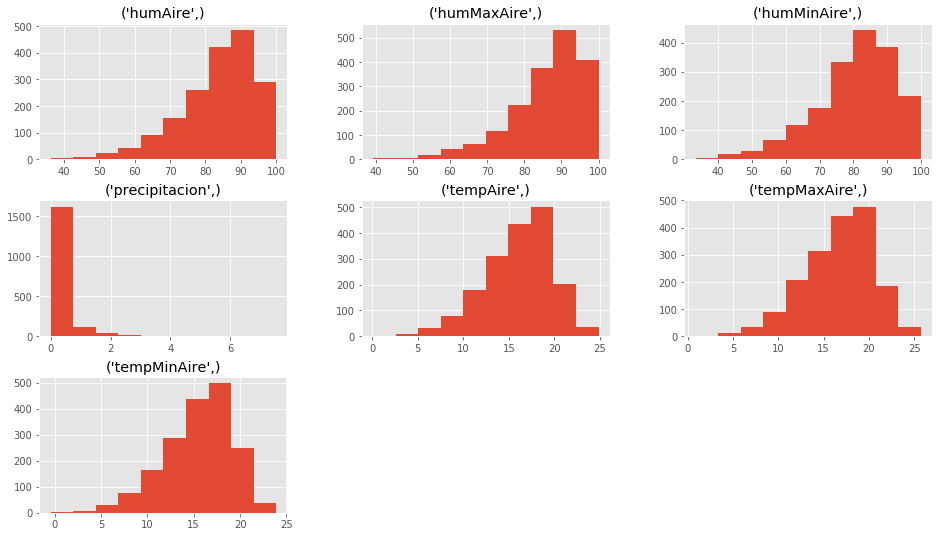

In [16]:
df.hist()
plt.show()

In [17]:
#df["tempAire"]= df["tempAire"].astype(int)
#df["humAire"]= df["humAire"].astype(int)
#precipitacion["precipitacion"]= precipitacion["precipitacion"].astype(int)
df = df.fillna(0)
df = df.astype(int)

In [18]:
x = df[['tempAire','humAire']].values
y = df[['precipitacion']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
df.dtypes

tempAire         int64
humAire          int64
tempMaxAire      int64
tempMinAire      int64
humMaxAire       int64
humMinAire       int64
precipitacion    int64
dtype: object

In [20]:
n_neighbors = 7
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(x_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(x_test, y_test)))

Accuracy of K-NN classifier on training set: 0.93
Accuracy of K-NN classifier on test set: 0.93


/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [21]:
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[427   1   0   0]
 [ 23   0   0   0]
 [  5   0   0   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       428
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1

    accuracy                           0.93       457
   macro avg       0.23      0.25      0.24       457
weighted avg       0.88      0.93      0.90       457



/opt/anaconda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
